In [1]:
import pandas as pd
#Importing all required libraries
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

#Plotting Plots
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [3]:
import pandas as pd
df = pd.read_csv("/Users/Arjun D H/Documents/new york environmental remediation sites.csv",engine='python',encoding='utf-8')

In [4]:
df.head(5)

,Program Number,Program Type,Program Facility Name,Site Class,Address1,Address2,Locality,County,ZIPCode,SWIS Code,...,Operator Name,Operator Address1,Operator Address2,Operator City,Operator State,Operator Zip,Location 1,NYS Municipal Boundaries,New York Zip Codes,Counties
0,130043,HW,New Cassel Industrial Area,P,Between Old Country Road and Railroad Tracks,NaN,New Cassel,Nassau,11590,3022,...,ADCHEM CORPORATION,625 MAIN STREET,,WESTBURY,NY,11590,"{'longitude': '-73.55396911', 'latitude': '40....",62,997.0,2094.0
1,C360070,BCP,Former General Motors North Tarrytown West Parcel,C,199 Beekman Ave,NaN,Sleepy Hollow,Westchester,10591,6034,...,NaN,NaN,NaN,NaN,NaN,NaN,"{'longitude': '-73.87100571', 'latitude': '41....",963,1347.0,2185.0
2,826003,HW,Jones Chemical,2,100 Sunny Sol Boulevard,,Caledonia,Livingston,14423,2622,...,"Jones Chemical Company, Inc.",100 Sunny Sol Boulevard,,Caledonia,NY,14423,"{'longitude': '-77.84362674', 'latitude': '42....",747,177.0,2091.0
3,C241078,BCP,Flushing Industrial Park (Western) Parcel 2,C,NW Corner of College Pt Blvd & 40th Road,NaN,Flushing,Queens,11354,4101,...,NaN,NaN,NaN,NaN,NaN,NaN,"{'longitude': '-73.83648769', 'latitude': '40....",196,824.0,2137.0
4,130003B,HW,Naval Weapons Ind. Reserve Plant,2,South Oyster Bay Road,NaN,Bethpage,Nassau,11714,3024,...,US Department of the Navy,"Grumman Corp., Stewart Ave",,Bethpage,NY,11714,"{'longitude': '-73.492416', 'latitude': '40.75...",59,1071.0,2094.0


In [5]:
df.columns

Index(['Program Number', 'Program Type', 'Program Facility Name', 'Site Class',
       'Address1', 'Address2', 'Locality', 'County', 'ZIPCode', 'SWIS Code',
       'DEC Region', 'Latitude', 'Longitude', 'Control Code', 'Control Type',
       'OU', 'Project Name', 'Project Completion Date', 'Waste Name',
       'Contaminants', 'Owner Name', 'Owner Address1', 'Owner Address2',
       'Owner City', 'Owner State', 'Owner ZIP', 'Disposal Name',
       'Disposal Address1', 'Disposal Address2', 'Disposal City',
       'Disposal ZIP', 'Disposal State', 'Operator Name', 'Operator Address1',
       'Operator Address2', 'Operator City', 'Operator State', 'Operator Zip',
       'Location 1', 'NYS Municipal Boundaries', 'New York Zip Codes',
       'Counties'],
      dtype='object')

In [6]:
df.isnull().sum()

Program Number                  0
Program Type                    0
Program Facility Name           0
Site Class                      0
Address1                        0
Address2                    45905
Locality                      159
County                          0
ZIPCode                         0
SWIS Code                       0
DEC Region                      0
Latitude                        0
Longitude                       0
Control Code                    0
Control Type                    0
OU                              0
Project Name                11291
Project Completion Date        97
Waste Name                  32790
Contaminants                23203
Owner Name                   3292
Owner Address1               4044
Owner Address2              34764
Owner City                   3853
Owner State                  3292
Owner ZIP                    3292
Disposal Name               41212
Disposal Address1           62959
Disposal Address2           47079
Disposal City 

In [7]:
df.shape

(70341, 42)

In [14]:
Program_facility= df['Program Facility Name'].dropna()

In [15]:
Program_facility= Program_facility.tolist() 

In [18]:
print(Program_facility[0])

New Cassel Industrial Area


In [19]:
print(len(Program_facility))

70341


In [20]:
def findProgramFacilityName(ProgramFacilityName):
    requiredProgramFacilityName = []
    for i in Program_facility:
        if(ProgramFacilityName in i):
            requiredProgramFacilityName.append(i)
    return(len(ProgramFacilityName))  

In [21]:
findProgramFacilityName("New Cassel Industrial Area")

26

In [23]:
top5Program_facility = df['Program Facility Name'].value_counts()
top5Program_facility[0:5]

New Cassel Industrial Area      11618
Arden Woods Estates Inc.         2172
Amtrak Sunnyside Yard            1374
Salina Town Landfill             1204
Old Upper Mountain Road Site      846
Name: Program Facility Name, dtype: int64

In [24]:
top10Operator_Name = df['Operator Name'].value_counts()
top10Operator_Name[0:10]

Arden Woods Estates, Inc.        1090
ARDEN WOODS ESTATES INC.         1082
ARKWIN INDUSTRIES, INC.           952
UNKNOWN3                          884
TISCHON CORPORATION               774
Amtrak - Sunnyside Yard           698
JOSEPH P. DEVITO                  676
Town of Salina                    611
TOWN OF SALINA                    593
Grumman Aerospace Corporation     428
Name: Operator Name, dtype: int64

In [25]:
top10County = df['County'].value_counts()
top10County[0:10]

Nassau         14892
Erie            4795
Queens          4675
Monroe          4633
Onondaga        4232
Niagara         4083
Richmond        2589
Suffolk         2505
Westchester     2322
Kings           2065
Name: County, dtype: int64

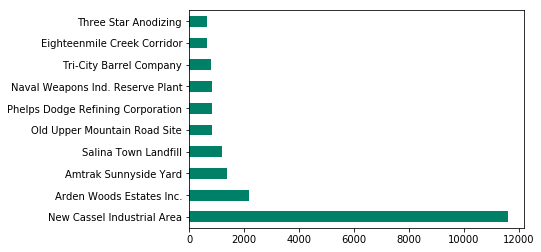

In [26]:
df['Program Facility Name'].value_counts()[:10].plot(kind='barh',colormap='summer')

In [27]:
top5County = df['County'].value_counts()
top5County = top5County[0:5]
print(type(top5County))

<class 'pandas.core.series.Series'>


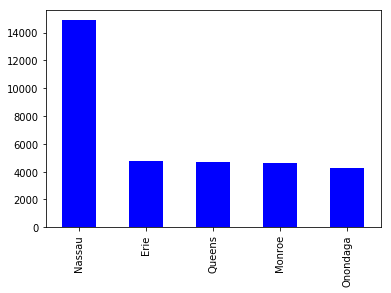

In [28]:
top5County.plot.bar(stacked=True, colormap='winter')

In [30]:
top5Program_Number = df['Program Number'].value_counts()
top5Program_Number[0:5]

130043    11618
243010     2172
241006     1374
734036     1204
932112      846
Name: Program Number, dtype: int64

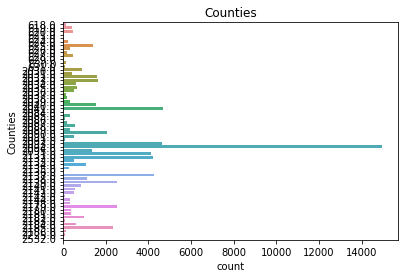

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(y="Counties", data=df)
plt.title("Counties")

plt.show()

In [33]:
diffProgram_Facility= df['Program Facility Name'].dropna()

In [34]:
diffProgram_Facility.value_counts()

New Cassel Industrial Area                         11618
Arden Woods Estates Inc.                            2172
Amtrak Sunnyside Yard                               1374
Salina Town Landfill                                1204
Old Upper Mountain Road Site                         846
Phelps Dodge Refining Corporation                    823
Naval Weapons Ind. Reserve Plant                     822
Tri-City Barrel Company                              807
Eighteenmile Creek Corridor                          660
Three Star Anodizing                                 656
Dearcop Farm                                         618
Crouse-Hinds Landfills                               576
Pfizer Sites B and D                                 502
Dewey Loeffel                                        431
Ellenville Scrap Iron and Metal                      404
Leica, Inc.                                          398
690 Saint Paul Street                                378
Maestri Property No. 2         

In [36]:
dfCounty = df['County'].value_counts()
dfCounty = dfCounty[0:10]

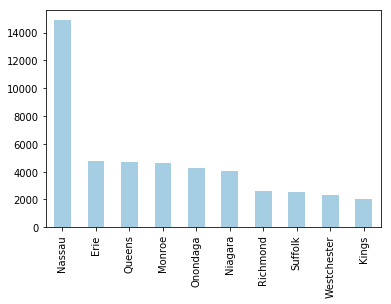

In [37]:
dfCounty.plot.bar(stacked=True, colormap='Paired')

# Analysis of New York Environmental Remediation Sites

In [38]:
Program_Facility= df['Program Facility Name'].dropna()

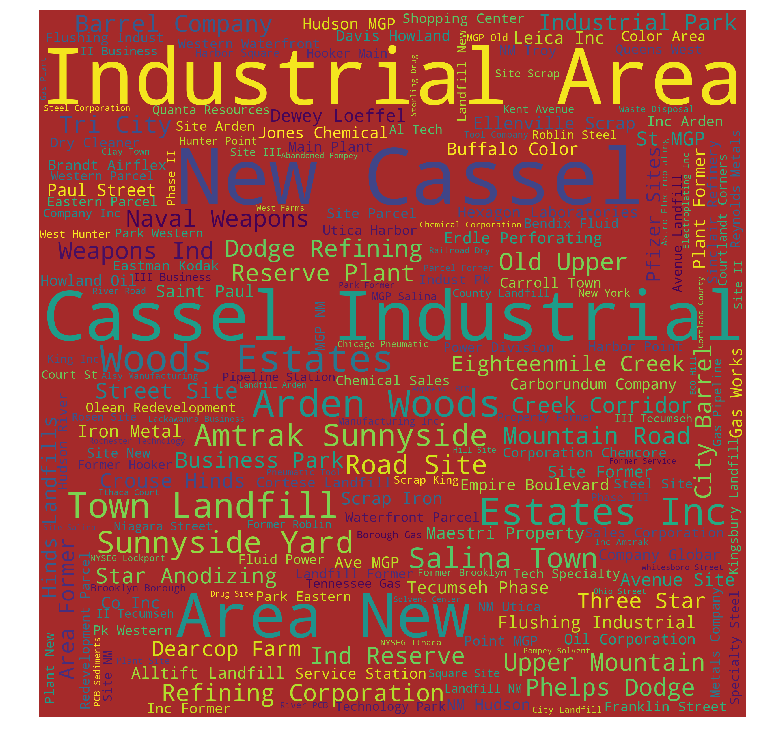

In [39]:
from wordcloud import WordCloud, STOPWORDS

def showWordCloud(data):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()])
    wordcloud = WordCloud(stopwords = STOPWORDS,
                         background_color = 'brown',
                         width = 2500,
                         height = 2500
                         ).generate(cleaned_word)
    plt.figure(1,figsize = (13,13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

showWordCloud(Program_Facility)

In [40]:
Program_Facility = df['Program Facility Name'].dropna()

In [41]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

In [42]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(Program_Facility))

print(data_words[:1])

[['new', 'cassel', 'industrial', 'area']]


In [43]:
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

['new', 'cassel', 'industrial', 'area']


In [44]:
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

#def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
def lemmatization(texts, allowed_postags=['NOUN']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [45]:
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN'])
#data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:4])

[['cassel', 'area'], ['motor', 'west', 'parcel'], ['jone', 'chemical'], ['park', 'parcel']]


In [46]:
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 1)]]


In [47]:
id2word[0]

'area'

In [48]:
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:3]]

[[('area', 1), ('cassel', 1)],
 [('motor', 1), ('parcel', 1), ('west', 1)],
 [('chemical', 1), ('jone', 1)]]

# LDA for Program Facility Name Data

In [49]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=5, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [50]:
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.222*"site" + 0.095*"facility" + 0.053*"chassis" + 0.053*"gm" + '
  '0.053*"delco" + 0.046*"road" + 0.044*"street" + 0.036*"corp" + '
  '0.022*"shipyard" + 0.021*"lighting"'),
 (1,
  '0.180*"company" + 0.173*"city" + 0.169*"barrel" + 0.169*"tri" + '
  '0.053*"corporation" + 0.028*"parking" + 0.023*"york" + 0.018*"electronic" + '
  '0.017*"instrument" + 0.016*"county"'),
 (2,
  '0.115*"utility" + 0.100*"king" + 0.094*"manufacturing" + 0.094*"wonder" + '
  '0.067*"mgp" + 0.056*"cleaner" + 0.042*"plant" + 0.033*"ash" + 0.033*"pond" '
  '+ 0.025*"wantagh"'),
 (3,
  '0.286*"landfill" + 0.136*"yonker" + 0.082*"town" + 0.072*"parcel" + '
  '0.067*"phase" + 0.066*"waterfront" + 0.043*"van" + 0.043*"buren" + '
  '0.033*"development" + 0.022*"penaluna"'),
 (4,
  '0.476*"area" + 0.411*"cassel" + 0.030*"siberia" + 0.025*"amphenol" + '
  '0.012*"hamilton" + 0.006*"star" + 0.006*"apartment" + 0.006*"anodizing" + '
  '0.005*"williamsburg_bridgeview" + 0.004*"dump"')]


In [51]:
# Compute Model Perplexity and Coherence Score

In [52]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -7.374936861320165

Coherence Score:  0.6151000782231776


In [53]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

C:\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.429231  0.035105       1        1  24.107485
0      0.174282  0.013231       2        1  20.505079
1      0.055439 -0.406569       3        1  19.624884
3      0.095313  0.227864       4        1  18.939995
2      0.104197  0.130368       5        1  16.822559, topic_info=     Category          Freq           Term         Total  loglift  logprob
0     Default  19111.000000           area  19111.000000  30.0000  30.0000
1     Default  16502.000000         cassel  16502.000000  29.0000  29.0000
21    Default   9017.000000       landfill   9017.000000  28.0000  28.0000
34    Default   7584.000000           site   7584.000000  27.0000  27.0000
48    Default   5894.000000        company   5894.000000  26.0000  26.0000
95    Default   5666.000000           city   5666.000000  25.0000  25.0000
589   Default   5512.000000         barrel   5512.000000  24.0000  24.0000
310   Default   5512.000000            tri   5512.000000  23.0000  23.0000
994   Default   4296.000000         yonker   4296.000000  22.0000  22.0000
657   Default   3221.000000        utility   3221.000000  21.0000  21.0000
13    Default   3240.000000       facility   3240.000000  20.0000  20.0000
431   Default   2794.000000           king   2794.000000  19.0000  19.0000
40    Default   2638.000000  manufacturing   2638.000000  18.0000  18.0000
1058  Default   2633.000000         wonder   2633.000000  17.0000  17.0000
552   Default   2596.000000           town   2596.000000  16.0000  16.0000
3     Default   2283.000000         parcel   2283.000000  15.0000  15.0000
571   Default   2109.000000          phase   2109.000000  14.0000  14.0000
14    Default   2078.000000     waterfront   2078.000000  13.0000  13.0000
51    Default   1881.000000            mgp   1881.000000  12.0000  12.0000
1045  Default   1804.000000        chassis   1804.000000  11.0000  11.0000
1046  Default   1804.000000          delco   1804.000000  10.0000  10.0000
1047  Default   1804.000000             gm   1804.000000   9.0000   9.0000
52    Default   1738.000000    corporation   1738.000000   8.0000   8.0000
59    Default   1582.000000        cleaner   1582.000000   7.0000   7.0000
163   Default   1567.000000           road   1567.000000   6.0000   6.0000
72    Default   1500.000000         street   1500.000000   5.0000   5.0000
1050  Default   1368.000000            van   1368.000000   4.0000   4.0000
1049  Default   1368.000000          buren   1368.000000   3.0000   3.0000
9     Default   1170.000000          plant   1170.000000   2.0000   2.0000
18    Default   1245.000000           corp   1245.000000   1.0000   1.0000
...       ...           ...            ...           ...      ...      ...
431    Topic5   2793.602783           king   2794.406494   1.7822  -2.3047
40     Topic5   2638.160645  manufacturing   2638.960205   1.7821  -2.3620
1058   Topic5   2632.800537         wonder   2633.607178   1.7821  -2.3640
51     Topic5   1880.713989            mgp   1881.515015   1.7820  -2.7004
59     Topic5   1581.526245        cleaner   1582.325928   1.7819  -2.8737
9      Topic5   1169.891235          plant   1170.704712   1.7818  -3.1751
870    Topic5    937.028259            ash    937.835571   1.7816  -3.3971
992    Topic5    933.714722           pond    934.533813   1.7816  -3.4006
1056   Topic5    706.943848        wantagh    707.760986   1.7813  -3.6788
209    Topic5    678.044434        product    678.843994   1.7813  -3.7206
1055   Topic5    577.725281         plater    578.533142   1.7811  -3.8807
1053   Topic5    577.725281     diagnostic    578.533142   1.7811  -3.8807
1054   Topic5    577.725281       kingston    578.533142   1.7811  -3.8807
31     Topic5    522.675415            inc    523.478210   1.7809  -3.9808
1044   Topic5    505.235962           ward    506.053070   1.7808  -4.0148
251    Topic5    407.642914          water    408.4483

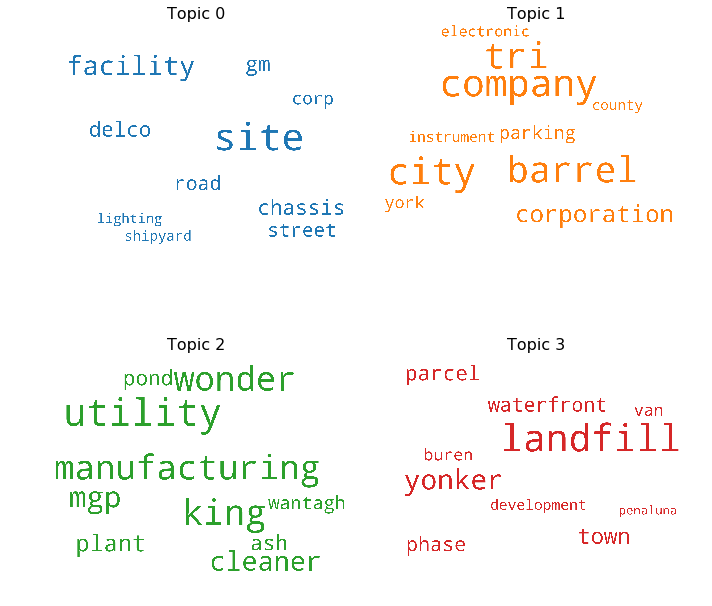

In [54]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

# Hyperparameter Tuning - Number of Topics and Alpha

In [55]:
def compute_coherence_values(dictionary, corpus, texts, num_topics_range, alpha_range):
    
    coherence_values = []
    model_list = []
    for alpha in alpha_range:
        for num_topics in num_topics_range:
            lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                               id2word=dictionary,
                                               num_topics=num_topics, 
                                               alpha=alpha,
                                               per_word_topics=True)
            model_list.append(lda_model)
            coherencemodel = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
            coherence_values.append((alpha, num_topics, coherencemodel.get_coherence()))
        

    return model_list, coherence_values

In [56]:
num_topics_range = [2, 6, 10, 15, 20]
alpha_range = [0.01, 0.1, 0.001]
model_list, coherence_values = compute_coherence_values(dictionary=id2word, 
                                                        corpus=corpus, 
                                                        texts=data_lemmatized, 
                                                        num_topics_range=num_topics_range, 
                                                        alpha_range=alpha_range)

In [57]:
coherence_df = pd.DataFrame(coherence_values, columns=['alpha', 'num_topics', 'coherence_value'])
coherence_df

,alpha,num_topics,coherence_value
0,0.010,2,0.682472
1,0.010,6,0.657812
2,0.010,10,0.631541
3,0.010,15,0.634597
4,0.010,20,0.612209
5,0.100,2,0.656420
6,0.100,6,0.655687
7,0.100,10,0.633851
8,0.100,15,0.630278
9,0.100,20,0.622363


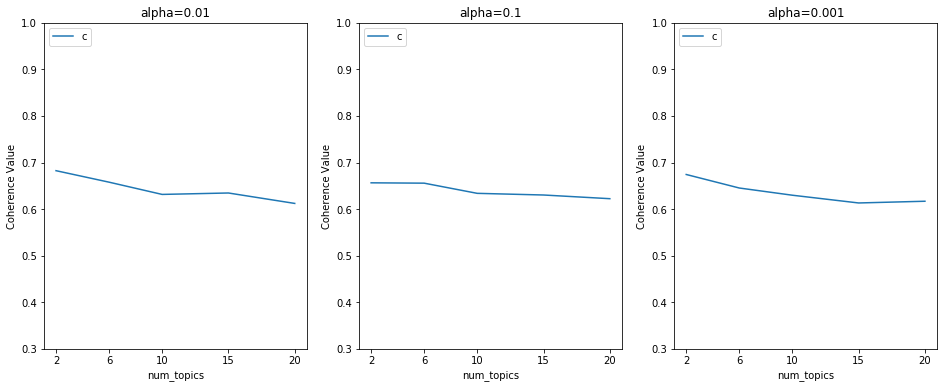

In [58]:
def plot_coherence(coherence_df, alpha_range, num_topics_range):
    plt.figure(figsize=(16,6))

    for i, val in enumerate(alpha_range):

        # subplot 1/3/i
        plt.subplot(1, 3, i+1)
        alpha_subset = coherence_df[coherence_df['alpha']==val]

        plt.plot(alpha_subset["num_topics"], alpha_subset["coherence_value"])
        plt.xlabel('num_topics')
        plt.ylabel('Coherence Value')
        plt.title("alpha={0}".format(val))
        plt.ylim([0.30, 1])
        plt.legend('coherence value', loc='upper left')
        plt.xticks(num_topics_range)

plot_coherence(coherence_df, alpha_range, num_topics_range)

In [59]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=15, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha=0.1,
                                           per_word_topics=True)

In [60]:
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.159*"utility" + 0.143*"king" + 0.135*"manufacturing" + 0.130*"wonder" + '
  '0.081*"county" + 0.072*"center" + 0.060*"training" + 0.036*"fire" + '
  '0.027*"inc" + 0.023*"plater"'),
 (1,
  '0.400*"yonker" + 0.226*"parcel" + 0.209*"phase" + 0.064*"park" + '
  '0.032*"business" + 0.028*"tecumseh" + 0.013*"technology" + 0.010*"downtown" '
  '+ 0.002*"llc" + 0.002*"complex"'),
 (2,
  '0.230*"ash" + 0.217*"north" + 0.087*"sea" + 0.079*"property" + '
  '0.060*"portion" + 0.038*"east" + 0.034*"laboratory" + 0.028*"mitchell" + '
  '0.028*"scotland" + 0.010*"cooper"'),
 (3,
  '0.223*"city" + 0.217*"barrel" + 0.217*"tri" + 0.140*"landfill" + '
  '0.040*"town" + 0.036*"amphenol" + 0.035*"parking" + 0.019*"van" + '
  '0.019*"buren" + 0.014*"avenue"'),
 (4,
  '0.487*"area" + 0.420*"cassel" + 0.050*"corporation" + 0.017*"siberia" + '
  '0.007*"refining" + 0.007*"dodge" + 0.007*"phelps" + 0.002*"metal" + '
  '0.001*"rochester" + 0.000*"pall"'),
 (5,
  '0.381*"company" + 0.310*"site" + 0.064

In [61]:
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -9.345074642608184

Coherence Score:  0.5872007630994989


In [62]:
coherence_model_lda.get_coherence_per_topic()

[0.4710050108740444,
 0.5761391522068071,
 0.5356578690242869,
 0.6242241094297366,
 0.6507968470613337,
 0.6143238890437526,
 0.6294121884570987,
 0.5588475206881367,
 0.5452556955312632,
 0.6194509889514667,
 0.6141108014070358,
 0.6578597239075916,
 0.5558714661215389,
 0.6049106017709472,
 0.5501455820174415]

In [63]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

C:\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.212085  0.110476       1        1  15.741716
5     -0.147623  0.107698       2        1  11.247543
3     -0.168122  0.150646       3        1   9.992932
1     -0.111735 -0.334945       4        1   7.136627
0     -0.100570  0.048913       5        1   6.968850
6     -0.058480 -0.276791       6        1   5.976904
13     0.032684  0.015556       7        1   5.774446
10    -0.027145  0.027428       8        1   5.708195
7     -0.029505  0.006196       9        1   5.322646
8     -0.125470  0.041303      10        1   5.152140
12     0.070820  0.012041      11        1   4.983881
9      0.144986  0.016380      12        1   4.787690
14     0.228921  0.024687      13        1   3.977573
2      0.238851  0.025246      14        1   3.953532
11     0.264473  0.025165      15        1   3.275324, topic_info=     Category          Freq                   Term         Total  loglift  \
0     Default  12759.000000                   area  12759.000000  30.0000   
1     Default  11018.000000                 cassel  11018.000000  29.0000   
9     Default   5937.000000                  plant   5937.000000  28.0000   
48    Default   7143.000000                company   7143.000000  27.0000   
34    Default   5802.000000                   site   5802.000000  26.0000   
994   Default   4800.000000                 yonker   4800.000000  25.0000   
72    Default   3756.000000                 street   3756.000000  24.0000   
51    Default   3638.000000                    mgp   3638.000000  23.0000   
14    Default   3251.000000             waterfront   3251.000000  22.0000   
95    Default   3709.000000                   city   3709.000000  21.0000   
589   Default   3608.000000                 barrel   3608.000000  20.0000   
310   Default   3608.000000                    tri   3608.000000  19.0000   
3     Default   2690.000000                 parcel   2690.000000  18.0000   
13    Default   2325.000000               facility   2325.000000  17.0000   
571   Default   2485.000000                  phase   2485.000000  16.0000   
441   Default   2218.000000                   york   2218.000000  15.0000   
59    Default   1938.000000                cleaner   1938.000000  14.0000   
21    Default   2331.000000               landfill   2331.000000  13.0000   
209   Default   1768.000000                product   1768.000000  12.0000   
870   Default   1517.000000                    ash   1517.000000  11.0000   
657   Default   1853.000000                utility   1853.000000  10.0000   
261   Default   1624.000000                    lot   1624.000000   9.0000   
374   Default   1432.000000                  north   1432.000000   8.0000   
67    Default   1398.000000                    gas   1398.000000   7.0000   
431   Default   1666.000000                   king   1666.000000   6.0000   
180   Default   1465.000000            development   1465.000000   5.0000   
40    Default   1574.000000          manufacturing   1574.000000   4.0000   
1058  Default   1520.000000                 wonder   1520.000000   3.0000   
1006  Default   1355.000000              volunteer   1355.000000   2.0000   
578   Default   1161.000000              tennessee   1161.000000   1.0000   
...       ...           ...                    ...           ...      ...   
101   Topic15      3.335262                plating      7.433882   2.6173   
651   Topic15      3.335262             perfection      7.433882   2.6173   
1068  Topic15      3.335487                   side      7.434464   2.6172   
614   Topic15      3.335168              tonawanda      7.433760   2.6172   
613   Topic15      3.335168                   coke      7.433760   2.6172   
511   Topic15      3.335132                  depot      7.433681   2.6172   
596   Topic15      3.335132                   army      7.433681   2.6172   
1052  Topic15      3.335356  westche

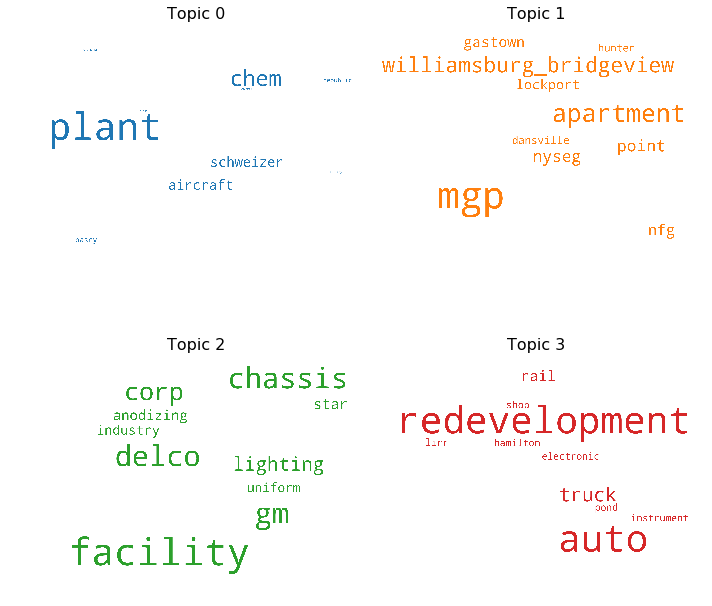

In [64]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()